In [2]:
import pandas as pd
import random
import os
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import holidays


from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot
from plotnine import *

In [6]:
price = pd.read_csv('../price_universe.csv', index_col=0)
price.index = pd.to_datetime(price.index)

In [7]:
price

,S&P 500,A,AAPL,ABC,ABT,ACGL,ADBE,ADI,ADM,ADP,...,SB,CC,KC,CT,LC,LH.1,FC,USDKRW,IEF,TLT
2018-01-02,2323.76,65.095131,40.950489,86.671799,53.904892,29.433332,177.699997,82.003815,34.854122,104.637054,...,18.76,2161.0,190.08,63.77,193.820,121.182,240.288,1061.20,96.978477,113.163429
2018-01-03,2339.29,66.751396,40.943363,86.994362,54.024086,29.459999,181.039993,83.021141,34.584610,105.773712,...,18.78,2130.0,188.00,64.18,194.250,122.113,240.206,1064.55,97.079865,113.704529
2018-01-04,2350.30,66.250656,41.133541,86.800812,53.932396,29.570000,183.220001,82.930305,35.167095,106.784096,...,18.72,2130.0,189.36,65.05,193.391,123.206,238.120,1062.15,97.033798,113.686455
2018-01-05,2366.48,67.309898,41.601864,87.851501,54.088268,29.453333,185.339996,83.266373,34.932358,106.720947,...,18.55,2119.0,187.71,64.17,188.744,123.165,232.272,1062.75,96.914001,113.361839
2018-01-08,2370.14,67.454338,41.447346,89.307693,53.932396,29.456667,185.039993,83.411736,34.854122,106.396202,...,18.25,2139.0,183.05,64.35,186.323,124.339,232.190,1066.10,96.867905,113.289734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,4801.71,156.562347,175.262802,127.924423,136.246506,43.480000,569.619995,169.451706,64.221039,237.479584,...,19.04,2591.0,219.98,86.08,156.671,70.424,193.477,1187.75,113.202599,145.104370
2021-12-27,4869.42,157.494995,179.289459,130.265030,138.498352,43.930000,577.679993,172.209473,64.839310,241.689438,...,19.06,2578.0,216.17,88.32,156.278,71.298,192.916,1186.80,113.241852,145.456100
2021-12-28,4865.61,157.931503,178.255417,130.719345,137.529083,44.270000,569.359985,171.139740,65.683281,241.473572,...,18.83,2603.0,214.79,86.88,156.418,71.156,195.220,1188.10,113.222221,144.879654
2021-12-29,4871.72,159.389984,178.344925,131.687180,138.233994,44.599998,569.289978,172.258560,65.761803,243.377304,...,18.98,2633.0,217.93,88.75,157.905,71.887,198.557,1186.40,112.643059,143.296921


In [18]:
df = price.iloc[:, :1]
df['ds'] = df.index
df['y'] = df['S&P 500']
df = df[['ds', 'y']]
df

C:\Users\bongkyun\AppData\Local\Temp\ipykernel_6624\1506482383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\bongkyun\AppData\Local\Temp\ipykernel_6624\1506482383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ds,y
2018-01-02,2018-01-02,2323.76
2018-01-03,2018-01-03,2339.29
2018-01-04,2018-01-04,2350.30
2018-01-05,2018-01-05,2366.48
2018-01-08,2018-01-08,2370.14
...,...,...
2021-12-23,2021-12-23,4801.71
2021-12-27,2021-12-27,4869.42
2021-12-28,2021-12-28,4865.61
2021-12-29,2021-12-29,4871.72


In [4]:
class StockPricePrediction:
    def __init__(self, data):
        self.data = data
        
    def create_prophet_model(self, interval_width=0.95, changepoint_prior_scale=0.05):
        self.model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=False,
                             seasonality_mode='multiplicative',
                             interval_width=interval_width, changepoint_prior_scale=changepoint_prior_scale)
        
    def train_model(self):
        self.model.fit(self.data)
        
    def predict(self, periods):
        future = self.model.make_future_dataframe(periods=periods)
        self.forecast = self.model.predict(future)
        
    def plot_forecast(self):
        self.model.plot(self.forecast)
        
    def plot_components(self):
        self.model.plot_components(self.forecast)

20:24:27 - cmdstanpy - INFO - Chain [1] start processing
20:24:27 - cmdstanpy - INFO - Chain [1] done processing


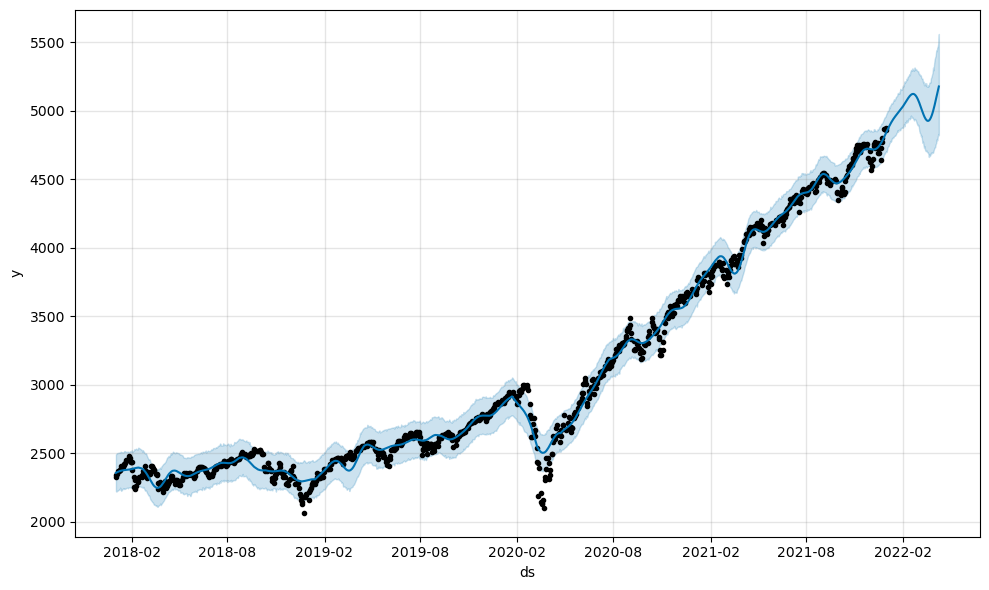

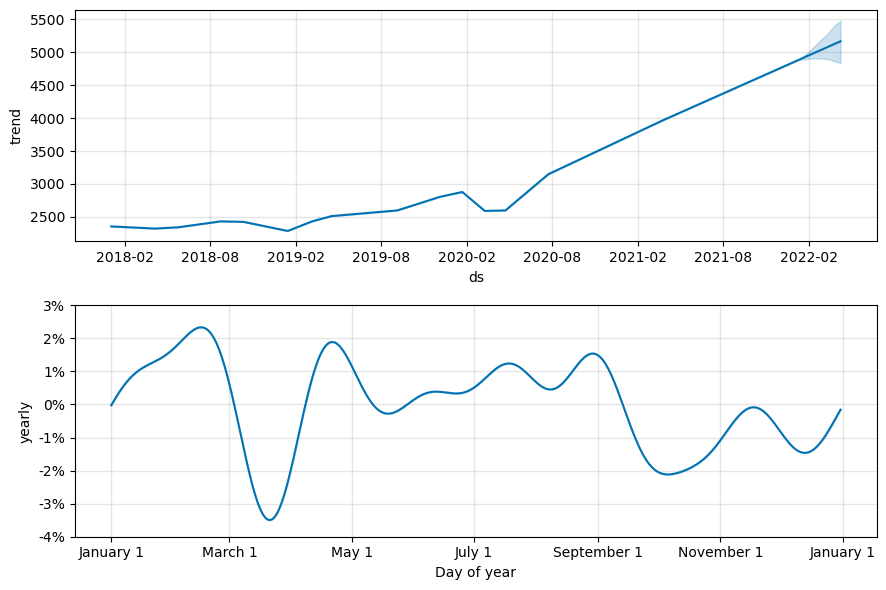

In [19]:
# Load the S&P 500 data
data = df

# Initialize the class with the data
sp500_prediction = StockPricePrediction(data)

# Create the Prophet model
sp500_prediction.create_prophet_model()

# Train the model on the data
sp500_prediction.train_model()

# Predict future stock prices for the next 100 periods
sp500_prediction.predict(periods=100)

# Plot the forecast
sp500_prediction.plot_forecast()

# Plot the components of the forecast
sp500_prediction.plot_components()